Jupyter Notebooks
==================

* You can run a cell by pressing ``[shift] + [Enter]`` or by pressing the "play" button in the menu.

![](figures/ipython_run_cell.png)

* You can get help on a function or object by pressing ``[shift] + [tab]`` after the opening parenthesis ``function(``

![](figures/ipython_help-1.png)

* You can also get help by executing ``function?``

![](figures/ipython_help-2.png)

## Numpy Arrays

Manipulating `numpy` arrays is an important part of doing machine learning
(or, really, any type of scientific computation) in python.  This will likely
be a short review for most. In any case, let's quickly go through some of the most important features.

In [1]:
import numpy as np

# Setting a random seed for reproducibility
rnd = np.random.RandomState(seed=123)

# Generating a random array
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # a 3 x 5 array

print(X)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]]


(Note that NumPy arrays use 0-indexing just like other data structures in Python.)

In [2]:
# Accessing elements

# get a single element 
# (here: an element in the first row and column)
print(X[0, 0])

# get a row 
# (here: 2nd row)
print(X[1])

# get a column
# (here: 2nd column)
print(X[:, 1])

0.6964691855978616
[0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
[0.28613933 0.9807642  0.72904971]


In [3]:
# Transposing an array
print(X.T)

[[0.69646919 0.42310646 0.34317802]
 [0.28613933 0.9807642  0.72904971]
 [0.22685145 0.68482974 0.43857224]
 [0.55131477 0.4809319  0.0596779 ]
 [0.71946897 0.39211752 0.39804426]]


$$\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8
\end{bmatrix}^T
= 
\begin{bmatrix}
    1 & 5 \\
    2 & 6 \\
    3 & 7 \\
    4 & 8
\end{bmatrix}
$$



In [4]:
# Creating a row vector
# of evenly spaced numbers over a specified interval.
y = np.linspace(0, 12, 5)
print(y)

[ 0.  3.  6.  9. 12.]


In [5]:
# Turning the row vector into a column vector
print(y[:, np.newaxis])

[[ 0.]
 [ 3.]
 [ 6.]
 [ 9.]
 [12.]]


In [6]:
# Getting the shape or reshaping an array

# Generating a random array
rnd = np.random.RandomState(seed=123)
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # a 3 x 5 array

print(X.shape)
print(X.reshape(5, 3))

(3, 5)
[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]
 [0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426]]


In [ ]:
# Indexing by an array of integers (fancy indexing)
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

There is much, much more to know, but these few operations are fundamental to what we'll
do during this tutorial.

## SciPy Sparse Matrices

We won't make very much use of these in this tutorial, but sparse matrices are very nice
in some situations.  In some machine learning tasks, especially those associated
with textual analysis, the data may be mostly zeros.  Storing all these zeros is very
inefficient, and representing in a way that only contains the "non-zero" values can be much more efficient.  We can create and manipulate sparse matrices as follows:

In [7]:
from scipy import sparse

# Create a random array with a lot of zeros
rnd = np.random.RandomState(seed=123)

X = rnd.uniform(low=0.0, high=1.0, size=(10, 5))
print(X)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]
 [0.73799541 0.18249173 0.17545176 0.53155137 0.53182759]
 [0.63440096 0.84943179 0.72445532 0.61102351 0.72244338]
 [0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029]
 [0.31226122 0.42635131 0.89338916 0.94416002 0.50183668]
 [0.62395295 0.1156184  0.31728548 0.41482621 0.86630916]
 [0.25045537 0.48303426 0.98555979 0.51948512 0.61289453]]


In [ ]:
# set the majority of elements to zero
X[X < 0.7] = 0
print(X)

In [ ]:
# turn X into a CSR (Compressed-Sparse-Row) matrix
X_csr = sparse.csr_matrix(X)
print(X_csr)

In [ ]:
# Converting the sparse matrix to a dense array
print(X_csr.toarray())

(You may have stumbled upon an alternative method for converting sparse to dense representations: `numpy.todense`; `toarray` returns a NumPy array, whereas `todense` returns a NumPy matrix. In this tutorial, we will be working with NumPy arrays, not matrices; the latter are not supported by scikit-learn.)

The CSR representation can be very efficient for computations, but it is not
as good for adding elements.  For that, the LIL (List-In-List) representation
is better:

In [ ]:
# Create an empty LIL matrix and add some items
X_lil = sparse.lil_matrix((5, 5))

for i, j in np.random.randint(0, 5, (15, 2)):
    X_lil[i, j] = i + j

print(X_lil)
print(type(X_lil))

In [ ]:
X_dense = X_lil.toarray()
print(X_dense)
print(type(X_dense))

Often, once an LIL matrix is created, it is useful to convert it to a CSR format
(many scikit-learn algorithms require CSR or CSC format)

In [ ]:
X_csr = X_lil.tocsr()
print(X_csr)
print(type(X_csr))

The available sparse formats that can be useful for various problems are:

- `CSR` (compressed sparse row)
- `CSC` (compressed sparse column)
- `BSR` (block sparse row)
- `COO` (coordinate)
- `DIA` (diagonal)
- `DOK` (dictionary of keys)
- `LIL` (list in list)

The [``scipy.sparse``](http://docs.scipy.org/doc/scipy/reference/sparse.html) submodule also has a lot of functions for sparse matrices
including linear algebra, sparse solvers, graph algorithms, and much more.

## matplotlib

Another important part of machine learning is the visualization of data.  The most common
tool for this in Python is [`matplotlib`](http://matplotlib.org).  It is an extremely flexible package, and
we will go over some basics here.

Since we are using Jupyter notebooks, let us use one of IPython's convenient built-in "[magic functions](https://ipython.org/ipython-doc/3/interactive/magics.html)", the "matoplotlib inline" mode, which will draw the plots directly inside the notebook.

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

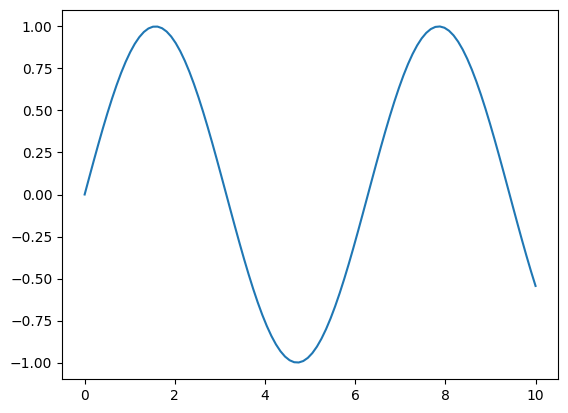

In [10]:
# Plotting a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x));

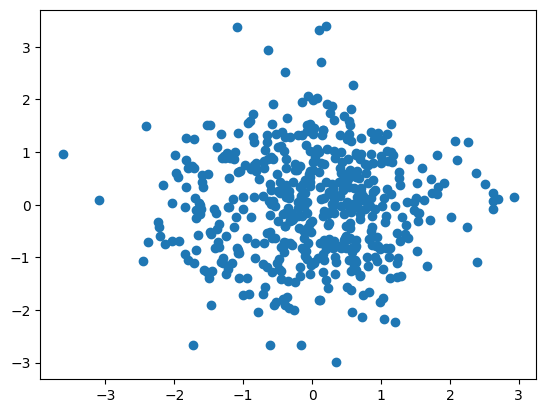

In [11]:
# Scatter-plot points
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

(100, 100)


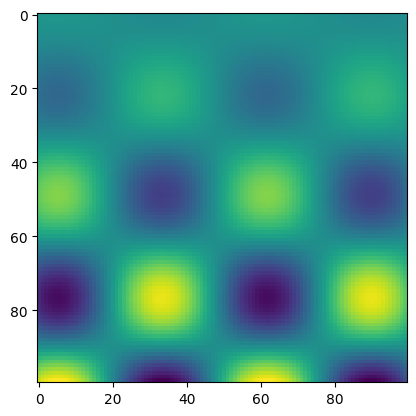

In [12]:
# Showing images using imshow
# - note that origin is at the top-left by default!

x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)

plt.imshow(im);

In [ ]:
# Contour plots 
# - note that origin here is at the bottom-left by default!
plt.contour(im);

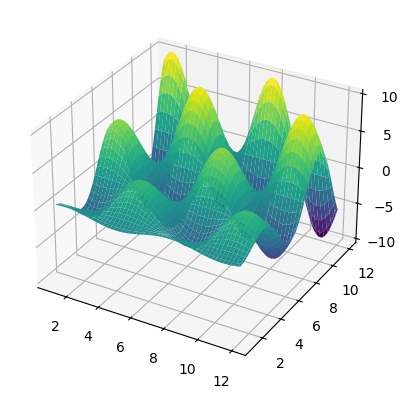

In [13]:
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);

There are many, many more plot types available.  One useful way to explore these is by
looking at the [matplotlib gallery](http://matplotlib.org/gallery.html).

You can test these examples out easily in the notebook: simply copy the ``Source Code``
link on each page, and put it in a notebook using the ``%load`` magic.
For example:

In [1]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py